In [3]:
import pandas as pd
import numpy as np
# from sklearn.linear_model import LinearRegression
from itertools import product
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
combined = pd.read_csv("Data/Combined_Dataset.csv", index_col="Unnamed: 0")

In [5]:
combined.set_index("date", inplace = True)

In [6]:
y_var = 'delta_cases_per_capita'

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import statsmodels.formula.api as sm

In [8]:
combined['delta_cases_per_capita_l1'] = combined['delta_cases_per_capita'].shift(1).fillna(0)

In [9]:
combined.rename(columns = {"delta_deaths_per_capita_United Kingdom": "delta_deaths_per_capita_United_Kingdom"}, inplace = True)

In [10]:
combined['delta_cases_per_capita_l2']= combined['delta_cases_per_capita'].shift(2).fillna(0)
combined['delta_cases_per_capita_l3']= combined['delta_cases_per_capita'].shift(3).fillna(0)
combined['delta_cases_per_capita_l4']= combined['delta_cases_per_capita'].shift(4).fillna(0)
combined['delta_cases_per_capita_l5']= combined['delta_cases_per_capita'].shift(5).fillna(0)
combined['delta_cases_per_capita_l6']= combined['delta_cases_per_capita'].shift(6).fillna(0)
combined['delta_cases_per_capita_l7']= combined['delta_cases_per_capita'].shift(7).fillna(0)
combined['delta_cases_per_capita_l14']= combined['delta_cases_per_capita'].shift(14).fillna(0)
combined['delta_cases_per_capita_l30']= combined['delta_cases_per_capita'].shift(30).fillna(0)

In [11]:
model=sm.ols(f'delta_cases_per_capita ~ delta_cases_per_capita_United_Kingdom +  delta_cases_per_capita_l1  +  delta_cases_per_capita_l2 +  delta_cases_per_capita_l3 +  delta_cases_per_capita_l4 +  delta_cases_per_capita_l5 +  delta_cases_per_capita_l6 + +  delta_cases_per_capita_l7 + delta_cases_per_capita_l14 + delta_cases_per_capita_l30+ log_new_vaccines_per_capita + delta_deaths_per_capita', data= combined)
results=model.fit(cov_type='HAC',
                                            cov_kwds={'maxlags':12,'use_correction':True})




In [12]:
for table in results.summary().tables:
    print(table.as_latex_tabular())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    & delta\_cases\_per\_capita & \textbf{  R-squared:         } &     0.915   \\
\textbf{Model:}            &            OLS            & \textbf{  Adj. R-squared:    } &     0.913   \\
\textbf{Method:}           &       Least Squares       & \textbf{  F-statistic:       } &     722.3   \\
\textbf{Date:}             &      Thu, 12 May 2022     & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}             &          10:47:14         & \textbf{  Log-Likelihood:    } &    5121.1   \\
\textbf{No. Observations:} &              611          & \textbf{  AIC:               } & -1.022e+04  \\
\textbf{Df Residuals:}     &              598          & \textbf{  BIC:               } & -1.016e+04  \\
\textbf{Df Model:}         &               12          & \textbf{                     } &             \\
\textbf{Covariance Type:}  &            HAC            & \textbf{                     } &             \\
\bottomru

In [13]:
test_data = pd.read_csv("Data/Test_Data.csv", index_col = "date")

In [14]:
lags = [1,2,3,4,5,6,7,14,30]
cols = [f'delta_cases_per_capita_l{i}' for i in lags]
test_data['delta_cases_per_capita_l1'] = test_data['delta_cases_per_capita'].shift(1)
test_data['delta_cases_per_capita_l2'] = test_data['delta_cases_per_capita'].shift(2)
test_data['delta_cases_per_capita_l3'] = test_data['delta_cases_per_capita'].shift(3)
test_data['delta_cases_per_capita_l4'] = test_data['delta_cases_per_capita'].shift(4)
test_data['delta_cases_per_capita_l5'] = test_data['delta_cases_per_capita'].shift(5)
test_data['delta_cases_per_capita_l6'] = test_data['delta_cases_per_capita'].shift(6)
test_data['delta_cases_per_capita_l7'] = test_data['delta_cases_per_capita'].shift(7)
test_data['delta_cases_per_capita_l14'] = test_data['delta_cases_per_capita'].shift(14)
test_data['delta_cases_per_capita_l30'] = test_data['delta_cases_per_capita'].shift(30)

In [15]:
combined

,delta_deaths_per_capita,delta_cases_per_capita,delta_deaths_per_capita.l1,delta_cases_per_capita.l1,log_new_vaccines_per_capita,log_new_people_vaccinated_per_capita,delta_cases_per_capita_United_Kingdom,delta_deaths_per_capita_United_Kingdom,delta_cases_per_capita_Germany,delta_deaths_per_capita_Germany,...,trend,delta_cases_per_capita_l1,delta_cases_per_capita_l2,delta_cases_per_capita_l3,delta_cases_per_capita_l4,delta_cases_per_capita_l5,delta_cases_per_capita_l6,delta_cases_per_capita_l7,delta_cases_per_capita_l14,delta_cases_per_capita_l30
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-02,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.864491e-07,0.000000e+00,3.933232e-07,0.000000e+00,...,2,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-03,0.0,2.006862e-07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.063675e-07,0.000000e+00,4.529176e-07,0.000000e+00,...,3,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-04,0.0,8.027447e-07,0.000000,2.006862e-07,0.000000e+00,0.000000e+00,8.210287e-07,0.000000e+00,6.197820e-07,0.000000e+00,...,4,2.006862e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-05,0.0,0.000000e+00,0.000000,8.027447e-07,0.000000e+00,0.000000e+00,7.184001e-07,0.000000e+00,1.299158e-06,0.000000e+00,...,5,8.027447e-07,2.006862e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,0.0,5.213827e-04,0.000013,3.259144e-04,2.693943e-10,1.112052e-10,5.728728e-04,2.433764e-06,3.341698e-04,1.501779e-06,...,607,3.259144e-04,4.374959e-04,0.000370,0.000346,0.000487,0.000495,0.000407,0.000326,0.000300
2021-10-29,0.0,5.099436e-04,0.000000,5.213827e-04,1.482583e-10,1.046810e-10,6.327639e-04,2.726988e-06,2.940150e-04,1.442185e-06,...,608,5.213827e-04,3.259144e-04,0.000437,0.000370,0.000346,0.000487,0.000495,0.000383,0.000290
2021-10-30,0.0,5.952352e-04,0.000000,5.099436e-04,1.034203e-10,8.457030e-11,5.982660e-04,2.433764e-06,2.567685e-04,1.072700e-06,...,609,5.099436e-04,5.213827e-04,0.000326,0.000437,0.000370,0.000346,0.000487,0.000437,0.000254


In [16]:
import math
from datetime import datetime, timedelta

for lag in lags:
    column = f'delta_cases_per_capita_l{lag}'
    for row in test_data[column].index:
        if math.isnan(test_data.loc[row, column]):
            date_to_fill = str(pd.to_datetime(row)-timedelta(lag))[:10]
            try:

                test_data.loc[row, column] = combined.loc[date_to_fill, 'delta_cases_per_capita']
            except:
                test_data.loc[row, column] = test_data.loc[date_to_fill, 'delta_cases_per_capita']


In [17]:
combined['delta_cases_per_capita_United_Kingdom_l1'] = combined['delta_cases_per_capita_United_Kingdom'].shift(1).fillna(0)

In [18]:
test_data.rename(columns = {"delta_cases_per_capita_United Kingdom": "delta_cases_per_capita_United_Kingdom"}, inplace = True)

In [19]:
test_data['delta_cases_per_capita_United_Kingdom_l1'] = test_data['delta_cases_per_capita_United_Kingdom'].shift(1).fillna(combined.loc['2021-11-01', 'delta_cases_per_capita_United_Kingdom'])

In [20]:
model=sm.ols(f'delta_cases_per_capita ~ delta_cases_per_capita_United_Kingdom_l1 +  delta_cases_per_capita_l1  +  delta_cases_per_capita_l2 +  delta_cases_per_capita_l5', data= combined)
ARX=model.fit(cov_type='HAC',
                                            cov_kwds={'maxlags':12,'use_correction':True})


model=sm.ols(f'delta_cases_per_capita ~ delta_cases_per_capita_l1  +  delta_cases_per_capita_l2 +  delta_cases_per_capita_l5', data= combined)
AR=model.fit(cov_type='HAC',
                                            cov_kwds={'maxlags':12,'use_correction':True})

model=sm.ols(f'delta_cases_per_capita ~ delta_cases_per_capita_United_Kingdom_l1', data= combined)
OLS=model.fit(cov_type='HAC',
                                            cov_kwds={'maxlags':12,'use_correction':True})

model=sm.ols(f'delta_cases_per_capita ~ delta_cases_per_capita_l1 + delta_cases_per_capita_l2 +log_new_people_vaccinated_per_capita', data= combined)
ARX_vaccine=model.fit(cov_type='HAC',
                                            cov_kwds={'maxlags':12,'use_correction':True})

In [21]:
predictions_ARX = ARX.get_prediction(test_data).summary_frame(alpha = 0.05)['mean']
predictions_AR = AR.get_prediction(test_data).summary_frame(alpha = 0.05)['mean']
predictions_OLS = OLS.get_prediction(test_data).summary_frame(alpha = 0.05)['mean']
predictions_ARX_vaccine = ARX_vaccine.get_prediction(test_data).summary_frame(alpha = 0.05)['mean']

In [22]:
actual = test_data['delta_cases_per_capita']

In [23]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month

In [24]:
predictions_ARX = pd.DataFrame(predictions_ARX)
predictions_ARX.set_index(actual.index, inplace = True)
predictions_ARX.index = pd.DatetimeIndex(predictions_ARX.index)

predictions_AR = pd.DataFrame(predictions_AR)
predictions_AR.set_index(actual.index, inplace = True)
predictions_AR.index = pd.DatetimeIndex(predictions_AR.index)

predictions_OLS = pd.DataFrame(predictions_OLS)
predictions_OLS.set_index(actual.index, inplace = True)
predictions_OLS.index = pd.DatetimeIndex(predictions_OLS.index)

predictions_ARX_vaccine = pd.DataFrame(predictions_ARX_vaccine)
predictions_ARX_vaccine.set_index(actual.index, inplace = True)
predictions_ARX_vaccine.index = pd.DatetimeIndex(predictions_ARX_vaccine.index)

actual.index = pd.DatetimeIndex(actual.index)

In [25]:
MSE_ARX_times_10000 = round(float((predictions_ARX.subtract(actual, axis = 0)**2).mean()*10000), 5)

In [26]:
MSE_AR_times_10000 = round(float((predictions_AR.subtract(actual, axis = 0)**2).mean()*10000), 5)

In [27]:
MSE_OLS_times_10000 =round(float((predictions_OLS.subtract(actual, axis = 0)**2).mean()*10000), 5)

In [28]:
MSE_ARX_vaccine_times_10000 =round(float((predictions_ARX_vaccine.subtract(actual, axis = 0)**2).mean()*10000), 5)

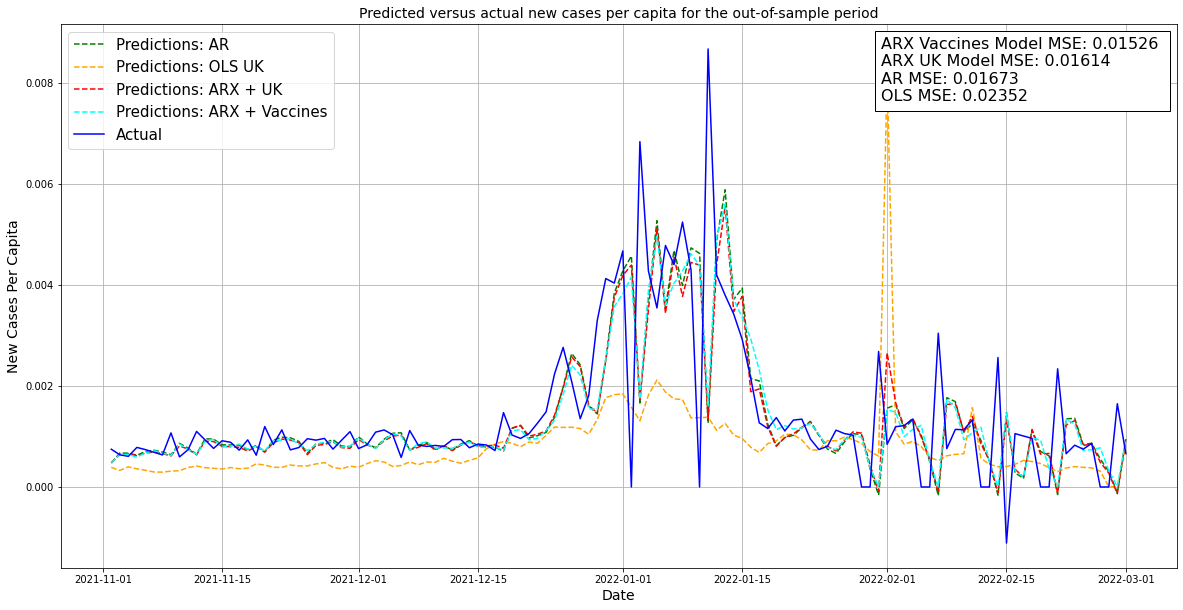

In [29]:
import matplotlib.pyplot as plt

from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots()


fig.set_size_inches(20, 10)
ax.plot(predictions_AR, label = 'Predictions: AR', color = 'green', linestyle = '--')
ax.plot(predictions_OLS, label = 'Predictions: OLS UK', color = 'orange', linestyle = '--')
ax.plot(predictions_ARX, label = 'Predictions: ARX + UK', color = 'red', linestyle = '--')
ax.plot(predictions_ARX_vaccine, label = 'Predictions: ARX + Vaccines', color = 'cyan', linestyle = '--')
ax.plot(actual, label = "Actual", color = 'blue')

ax.legend(fontsize = 15, loc = 2)
ax.set_xlabel("Date", fontsize = 14)
ax.set_ylabel("New Cases Per Capita", fontsize = 14)
ax.set_title("Predicted versus actual new cases per capita for the out-of-sample period", fontsize = 14)
ax.grid('on')

anchored_text = AnchoredText(f"ARX Vaccines Model MSE: {MSE_ARX_vaccine_times_10000} \nARX UK Model MSE: {MSE_ARX_times_10000} \nAR MSE: {MSE_AR_times_10000} \nOLS MSE: {MSE_OLS_times_10000}", loc=1,borderpad=0.4,frameon=True, prop = dict(fontsize = '16'))
ax.add_artist(anchored_text)
